# **New York City Airbnb**

### **Group Q**
Nida Khairunnisa Kusumawardhani



## **Problem**
***Airbnb*** Problem is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from "air mattress B&B.” 

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This public dataset is part of Airbnb, and the original source can be found on this website.


## **Clear questionh**
In this case, we'll be focus on Price Predictions in order to dive into possible future prices to open new Airbnb based on neighbourhood?


## **Success criteria**
Using Machine Learning techniques and with the power of Regression Models to find a positive result coming up with the generalized increase in prices in New York City 

## **Upload Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Final Project PROA/AB_NYC_2019.csv')

## **Data Understanding**

In [ ]:
df.shape
# shape() : Melihat jumlah baris dan kolom.

(48895, 16)

In [ ]:
df.info()
# info() : Nomor index beserta tipe datanya.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()
# describe() : Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Data Preparation**

In [ ]:
df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df = df.drop('name', axis=1)
df = df.drop('host_name', axis=1)
df = df.drop('last_review', axis=1)

In [ ]:
df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [ ]:
#menghitung missing value

df.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna({'reviews_per_month':0}, inplace=True)
#menganti nilai null menjadi 0

In [ ]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

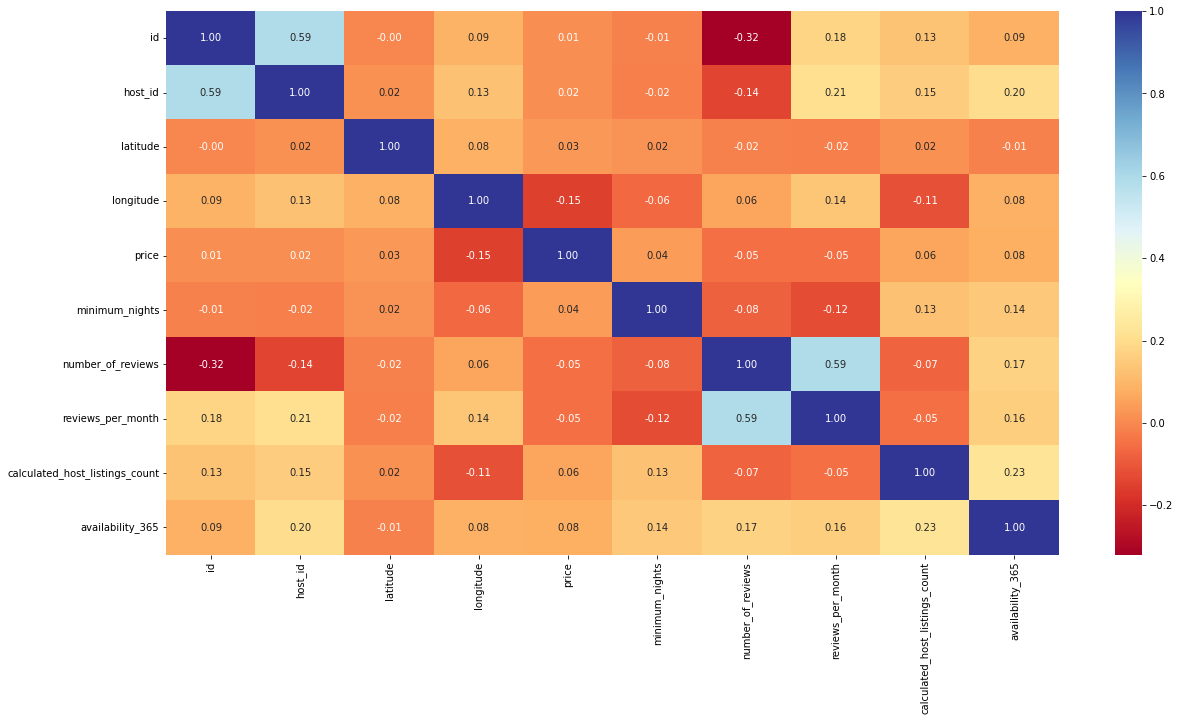

In [ ]:
#correlation coefficient heatmap

fig, ax = plt.subplots(figsize=(20,10)) 
corr = df.corr()                                #corr=korelasi
sns.heatmap(corr,annot=True,fmt='.2f', cmap = "RdYlBu", ax=ax)

## **Exploration Data and Visualization**

### **Selection Data**

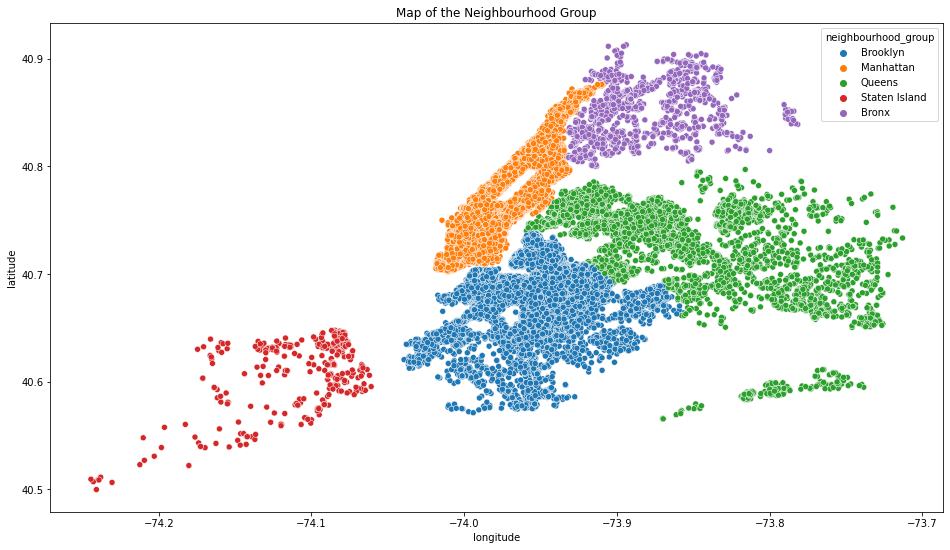

In [ ]:
x = df['longitude']
y = df['latitude']
hue = df['neighbourhood_group']
plt.figure(figsize=(16,9))
plt.title('Map of the Neighbourhood Group')
sns.scatterplot(x=x, y=y,hue=hue)
plt.show()

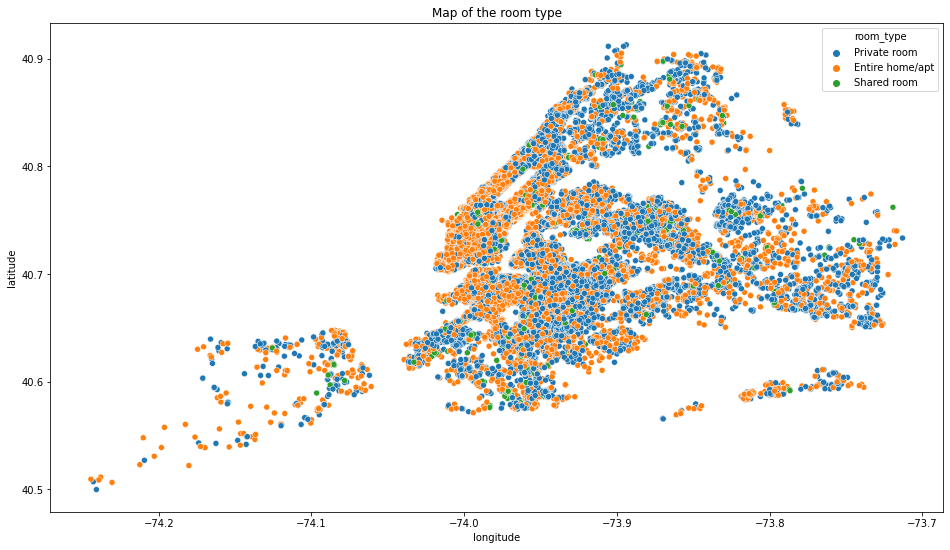

In [ ]:
x = df['longitude']
y = df['latitude']
hue = df['room_type']
plt.figure(figsize=(16,9))
plt.title('Map of the room type')
sns.scatterplot(x=x, y=y,hue=hue)
plt.show()

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### **Neigbourhood vs Number of listing**

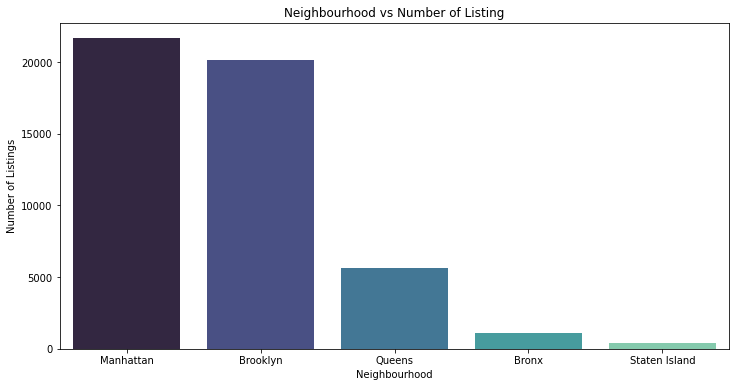

In [ ]:
neighbourhood = df['neighbourhood_group'].value_counts().reset_index()
neighbourhood.rename(columns={'index':'Neighbourhood','neighbourhood_group':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(neighbourhood['Neighbourhood'],neighbourhood['Number of Listings'],palette='mako');
plt.title('Neighbourhood vs Number of Listing');

Dapat kita lihat, Bahwa Manhattan dan Brooklyn merupakan daerah Airbnb terbanyak

In [ ]:
neighbourhood = df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index()
neighbourhood.rename(columns={'id':'Number of listings'},inplace=True)
neighbourhood_group = neighbourhood.pivot(index='neighbourhood_group',columns='room_type',values='Number of listings')

neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


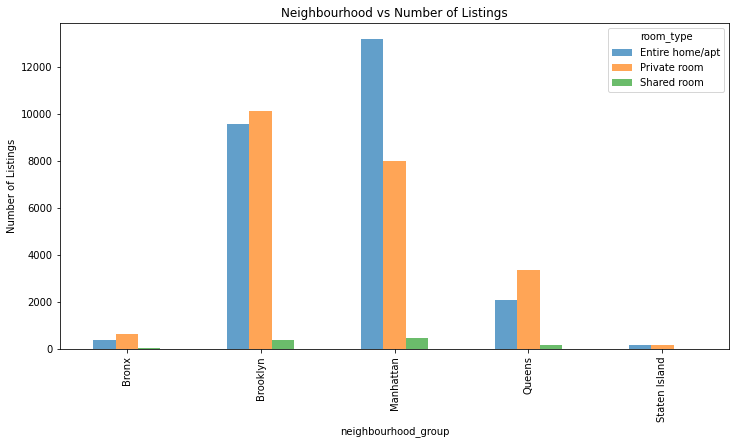

In [ ]:
neighbourhood_group.plot(kind='bar',figsize=(12, 6),style="g",alpha=0.7);
plt.title('Neighbourhood vs Number of Listings');
plt.ylabel('Number of Listings');

Dapat kita lihat, Manhattan dan Brooklyn memiliki jumlah Rumah/Apt dan Kamar Pribadi paling banyak.

### **Room Type vs number of listings**

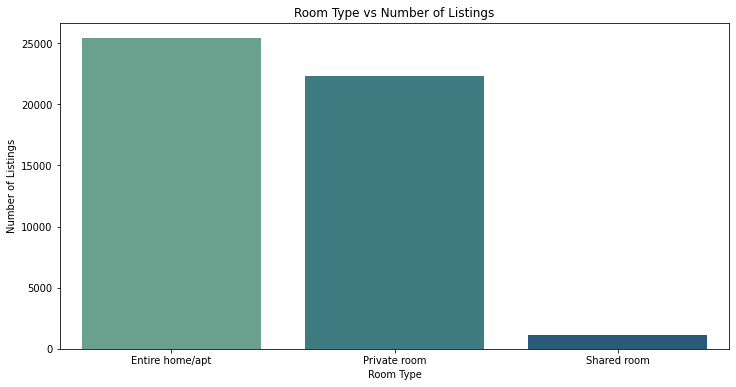

In [ ]:
room_type = df['room_type'].value_counts().reset_index()
room_type
room_type.rename(columns={'index':'Room Type','room_type':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(room_type['Room Type'],room_type['Number of Listings'],palette='crest');
plt.title('Room Type vs Number of Listings');

Dapat kita lihat, kamar bersama memiliki jumlah number of listing terendah dibandingkan rumah/apt dan kamar pribadi

### **Room Type vs price**

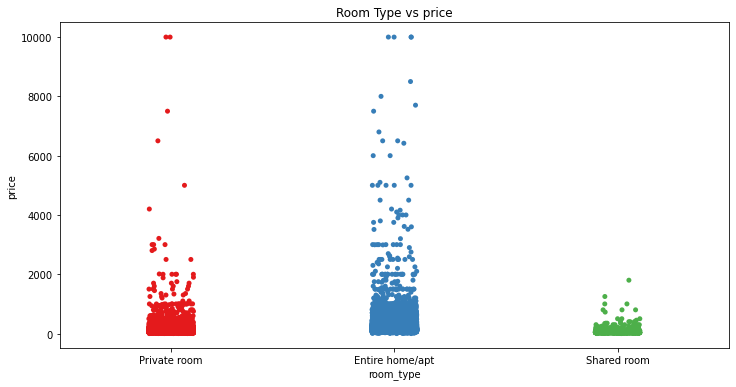

In [ ]:
plt.figure(figsize=(12, 6));
sns.stripplot(x="room_type",y="price",data=df,palette='Set1');
plt.title('Room Type vs price');

kamar bersama memiliki harga terendah dengan nilai maksimal dibawah 400 sedangkan kamar pribadi dan rumah/apt memiliki harga tertinggi sebesar 10000

### **Neighbourhood group vs price**

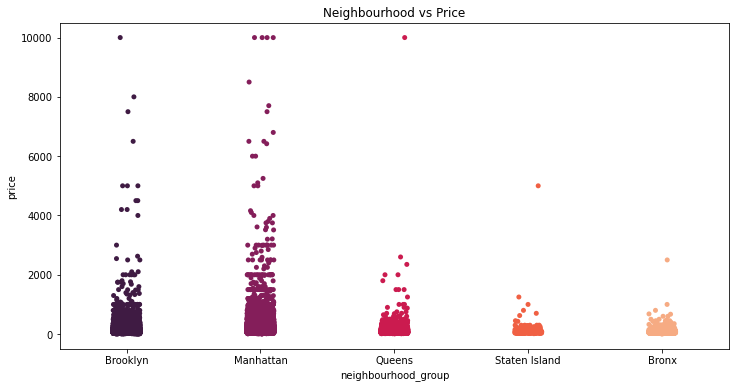

In [ ]:
plt.figure(figsize=(12, 6));
sns.stripplot(x="neighbourhood_group",y="price",data=df,palette='rocket');
plt.title('Neighbourhood vs Price');

Brooklyn dan Manhattan merupakan lingkungan dengan harga tinggi dalam daftar Airbnb

### **Room Type vs Availability (days)**

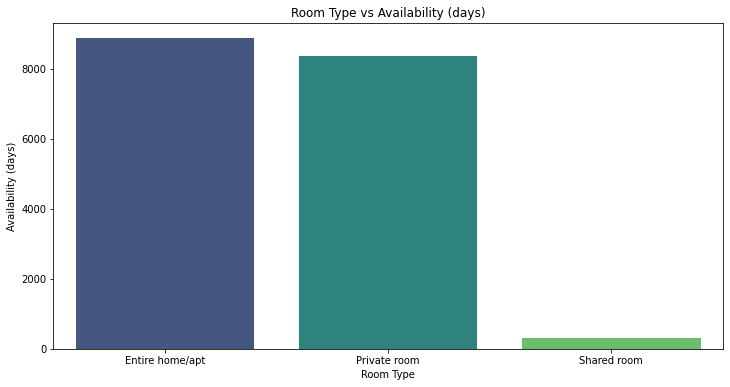

In [ ]:
availability = df.loc[df['availability_365'] == 0]['room_type'].value_counts().reset_index()
availability.rename(columns={'index':'Room Type','room_type':'Availability (days)'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(availability['Room Type'],availability['Availability (days)'],palette='viridis');
plt.title('Room Type vs Availability (days)');

### **Host_id vs Number of Listings**

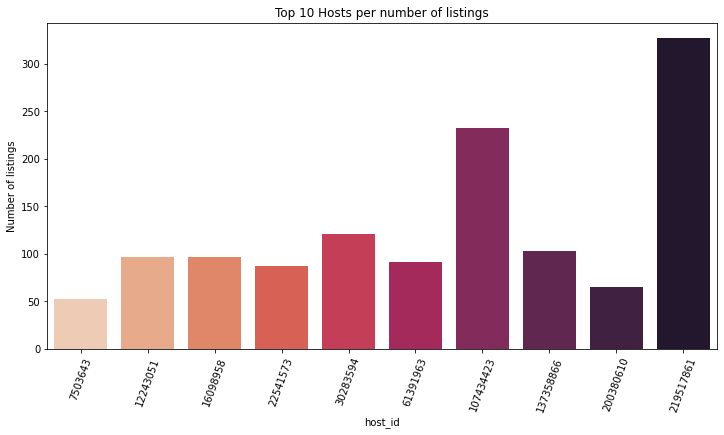

In [ ]:
hosts = df.groupby(['host_id'])['id'].count().sort_values(ascending=False).reset_index().head(10)
hosts.rename(columns={'id':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(hosts['host_id'],hosts['Number of listings'],palette='rocket_r');
plt.title('Top 10 Hosts per number of listings');
plt.xticks(rotation=70);

In [ ]:
!pip install pywedge
import pywedge as pw
mc = pw.Pywedge_Charts(df, c=None, y = 'neighbourhood_group')
charts = mc.make_charts()

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


HTML(value='<h2>Pywedge Make_Charts </h2>')

## **Advance Data Preparation**

### **Drop unnecessary column**

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('neighbourhood_group', axis=1)
df = df.drop('host_id', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)
df.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Kensington,Private room,149,1,9,0.21,6,365
1,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Harlem,Private room,150,3,0,0.00,1,365
3,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,East Harlem,Entire home/apt,80,10,9,0.10,1,0


### **Transforming Data**

In [ ]:
from sklearn import preprocessing

X = df.values

neighbourhood = preprocessing.LabelEncoder()
neighbourhood.fit(df['neighbourhood'].unique())
X[:,0] = neighbourhood.transform(X[:,0]) 

room_type = preprocessing.LabelEncoder()
room_type.fit(df['room_type'].unique())
X[:,1] = room_type.transform(X[:,1])

X[:,7]

array([365, 355, 365, ..., 27, 2, 23], dtype=object)

In [ ]:
X = pd.DataFrame(data=X).astype("float64")
X

,0,1,2,3,4,5,6,7
0,108.0,1.0,149.0,1.0,9.0,0.21,6.0,365.0
1,127.0,0.0,225.0,1.0,45.0,0.38,2.0,355.0
2,94.0,1.0,150.0,3.0,0.0,0.00,1.0,365.0
3,41.0,0.0,89.0,1.0,270.0,4.64,1.0,194.0
4,61.0,0.0,80.0,10.0,9.0,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...
48890,13.0,1.0,70.0,2.0,0.0,0.00,2.0,9.0
48891,28.0,1.0,40.0,4.0,0.0,0.00,2.0,36.0
48892,94.0,0.0,115.0,10.0,0.0,0.00,1.0,27.0
48893,95.0,2.0,55.0,1.0,0.0,0.00,6.0,2.0


## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
x = X.iloc[:,[0,1,3,4,5,6,7]]
y = X[2]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125.0
24351    101.0
10069    189.0
11679    145.0
16315    120.0
Name: 2, dtype: float64

In [ ]:
x_train.shape

(44005, 7)

### **Linear Regression**

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)
predictions=reg.predict(x_test)

print('r2_score :',r2_score(y_test,predictions))
print('MSE :', mean_squared_error(y_test, predictions))

r2_score : 0.10727820306914049
MSE : 30087.186610418423


In [ ]:
hasil = pd.DataFrame({
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': predictions.flatten()}).head(20)

hasil

,Actual Prices,Predicted Prices
0,99.0,47.757057
1,75.0,208.159682
2,260.0,236.597683
3,200.0,201.947100
4,135.0,150.018265
5,35.0,42.332625
6,225.0,203.505461
7,35.0,-30.927169
8,280.0,254.500801
9,125.0,231.293658


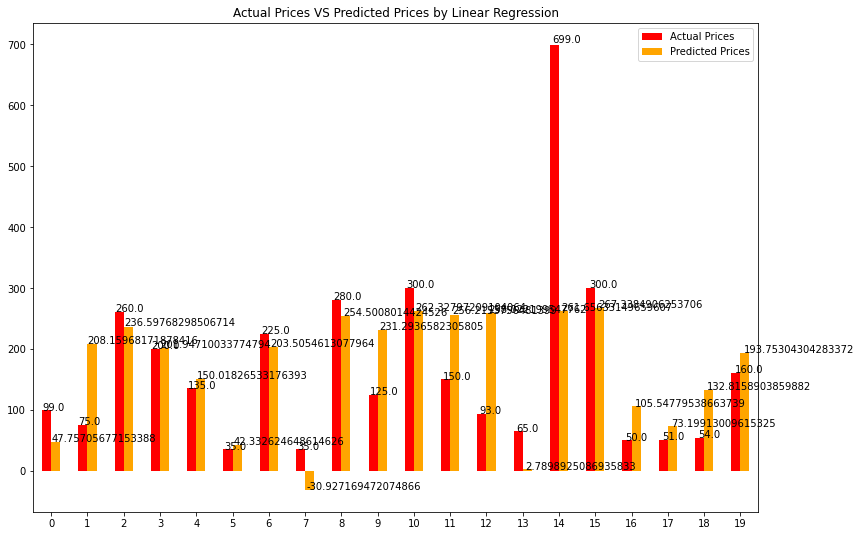

In [ ]:
ax = hasil.plot.bar(rot=0, color=['red', 'orange'], figsize=(13,9))
ax.set_title("Actual Prices VS Predicted Prices by Linear Regression")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

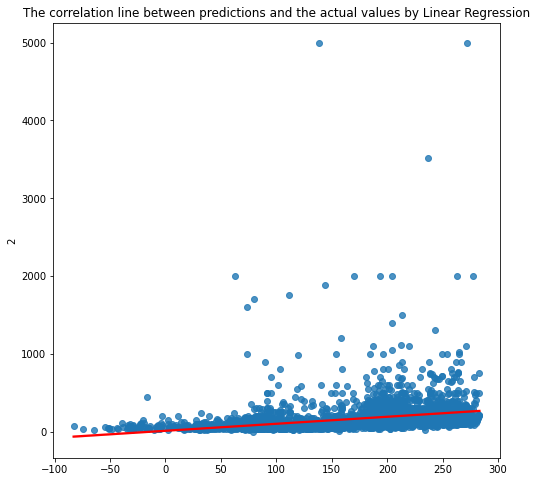

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(predictions, y_test,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Linear Regression")
plt.show()

Text(0.5, 1.0, 'Distributor plot Linear Regression')

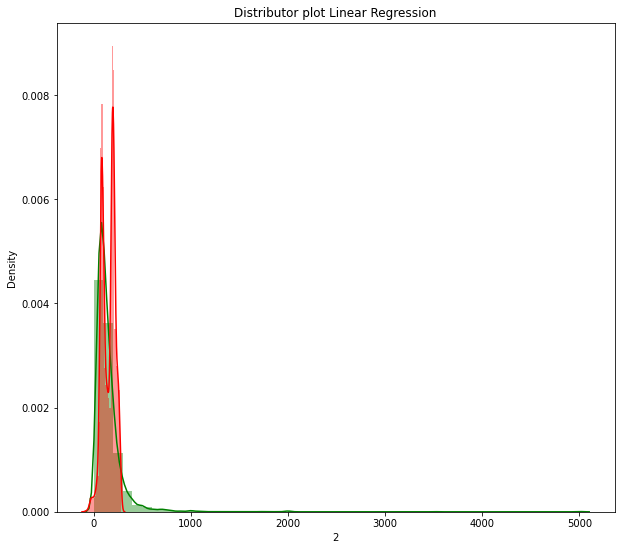

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(predictions, color="red");
plt.title("Distributor plot Linear Regression")

### **Decision Tree Regression**

In [ ]:
decision_tree=DecisionTreeRegressor(min_samples_leaf=.0001)
decision_tree.fit(x_train,y_train)
predictions1=decision_tree.predict(x_test)

print('r2_score :',r2_score(y_test,predictions1))
print('MSE :', mean_squared_error(y_test, predictions1))

r2_score : 0.01960616825984607
MSE : 33041.975975807516


In [ ]:
hasil1 = pd.DataFrame({
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': predictions1.flatten()}).head(20)
hasil1.head(5)

,Actual Prices,Predicted Prices
0,99.0,107.200000
1,75.0,302.000000
2,260.0,209.166667
3,200.0,347.888889
4,135.0,84.375000


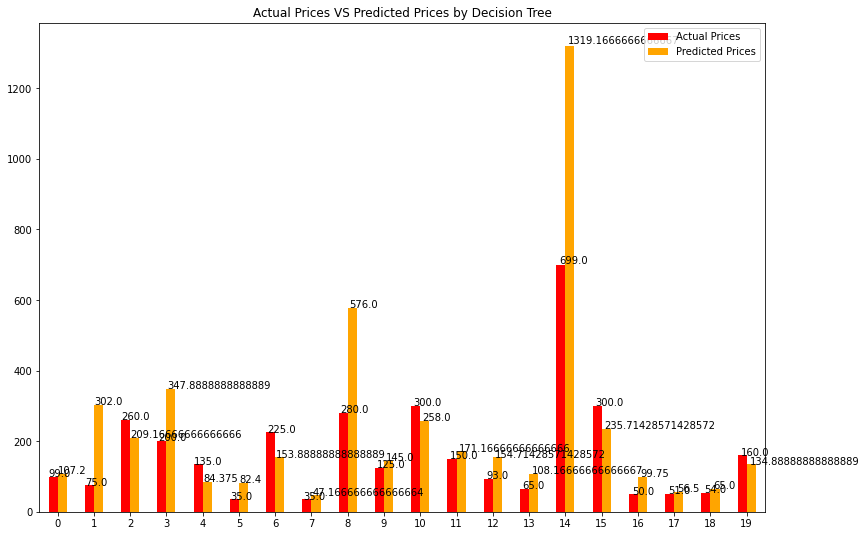

In [ ]:
ax = hasil1.plot.bar(rot=0, color=['red', 'orange'], figsize=(13,9))
ax.set_title("Actual Prices VS Predicted Prices by Decision Tree")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

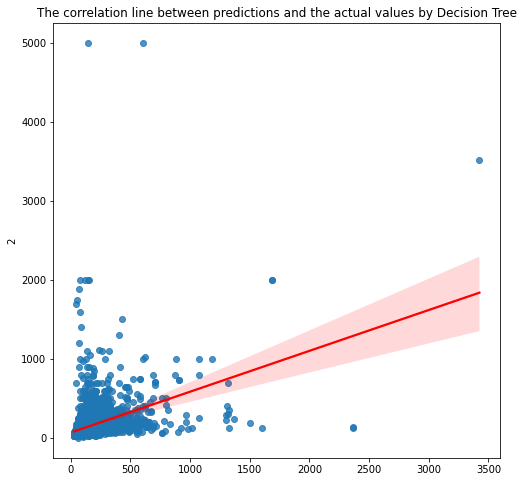

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(predictions1, y_test,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Decision Tree")
plt.show()

Text(0.5, 1.0, 'Distributor plot Decision Tree Regression')

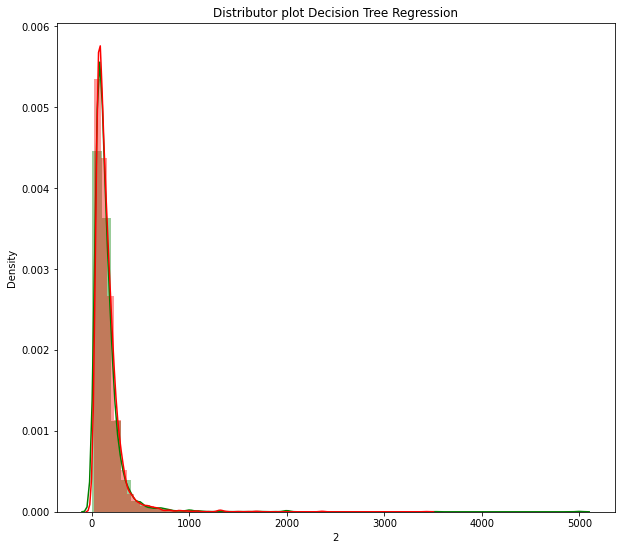

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(predictions1, color="red");
plt.title("Distributor plot Decision Tree Regression")

### **Logistic Regression**

In [ ]:
logit=LogisticRegression(solver="lbfgs", multi_class="auto")
logit.fit(x_train,y_train)
predictions2=logit.predict(x_test)

print('r2_score :',r2_score(y_test,predictions2))
print('MSE :', mean_squared_error(y_test, predictions2))

r2_score : -0.03518334085086039
MSE : 34888.533537832314


In [ ]:
hasil2 = pd.DataFrame({
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': predictions2.flatten()}).head(20)

hasil2.head(5)

,Actual Prices,Predicted Prices
0,99.0,100.0
1,75.0,150.0
2,260.0,100.0
3,200.0,150.0
4,135.0,100.0


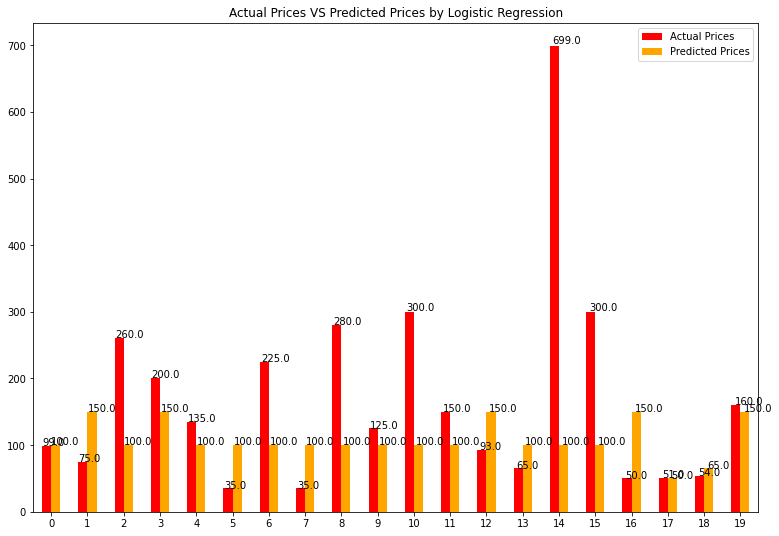

In [ ]:
ax = hasil2.plot.bar(rot=0, color=['red', 'orange'], figsize=(13,9))
ax.set_title("Actual Prices VS Predicted Prices by Logistic Regression")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

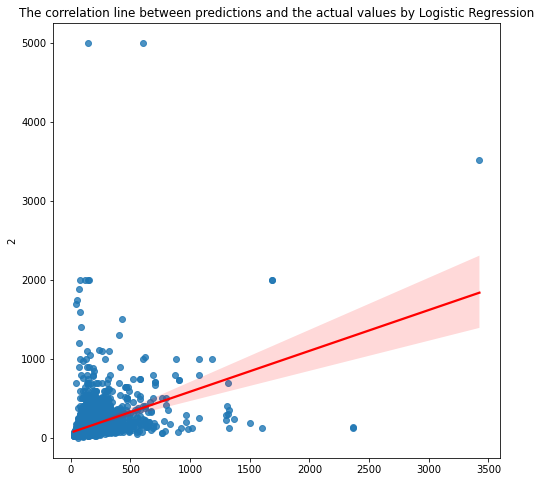

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(predictions1, y_test,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Logistic Regression")
plt.show()

Text(0.5, 1.0, 'Distributor plot Logistic Regression')

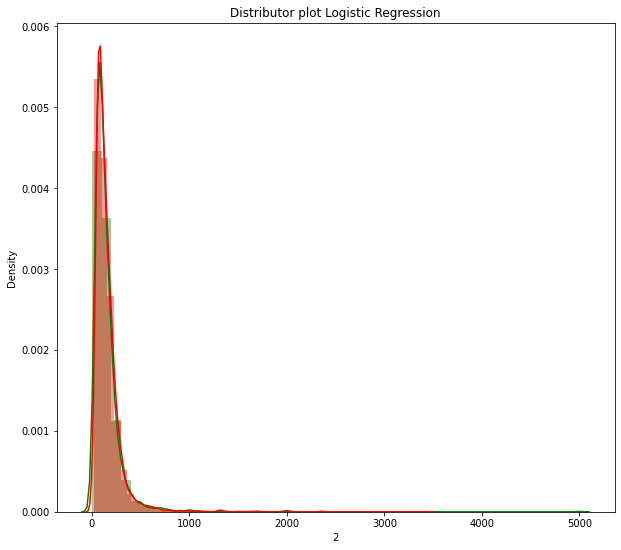

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(predictions1, color="red");
plt.title("Distributor plot Logistic Regression")

### **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_poly)

print('r2_score :',r2_score(y,y_pred))
print('MSE :', mean_squared_error(y, y_pred))

r2_score : 0.0803610529295069
MSE : 53038.19509266649


In [ ]:
hasil3 = pd.DataFrame({'Actual Prices':y, 'Predicted Prices':y_pred})
hasil3.head()

,Actual Prices,Predicted Prices
0,149.0,234.637490
1,225.0,306.645562
2,150.0,185.852518
3,89.0,65.980751
4,80.0,155.149441


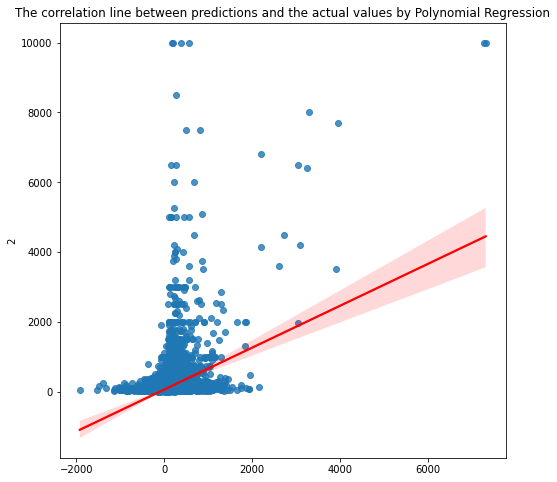

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(y_pred, y,line_kws={'color': 'red'})
plt.title("The correlation line between predictions and the actual values by Polynomial Regression")
plt.show()

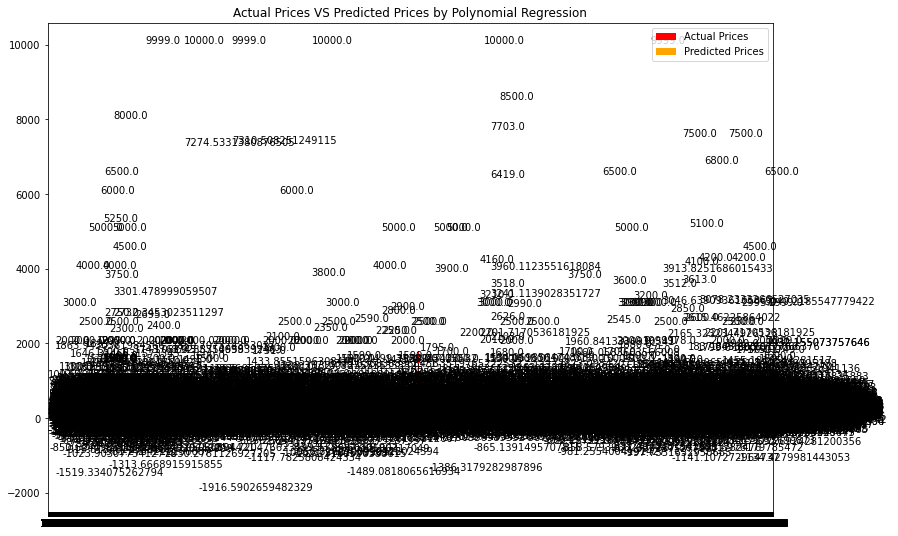

In [ ]:
ax = hasil3.plot.bar(rot=0, color=['red', 'orange'], figsize=(13,9))
ax.set_title("Actual Prices VS Predicted Prices by Polynomial Regression")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

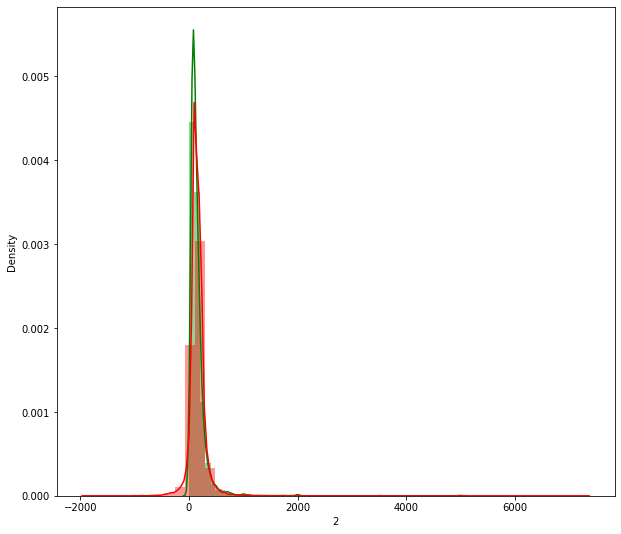

In [ ]:
dims = (10, 9)
fig, ax = plt.subplots(figsize=dims)

sns.set_color_codes()
sns.distplot(y_test, color="green")
sns.distplot(y_pred, color="red");